# Introduction

In this notebook, you will review the singular value decomposition (SVD) of matrices and learn about some of its applications in data analysis.  This notebook is heavy on linear algebra, so you may need to go back and review various concepts along the way.  Pretty much any standard linear algebra text should suffice.  Some free, online options can be found [here](https://aimath.org/textbooks/approved-textbooks/).

In this notebook, you'll also use the two included image files.

# Rank-one matrices

A *rank-one matrix* is an $m\times n$ matrix of the form $A=ab^T$, where $a$ is a nonzero vector in $\mathbb{R}^m$ and $b$ is a nonzero vector in $\mathbb{R}^n$.  As we'll see, the rank-one matrices play a special role as "atoms" in the singular value decomposition (SVD).

## Why they're called that

As you might expect, such a matrix is called *rank-one*, because its rank is... one.  One way to see this is through the [rank-nullity theorem](https://en.wikipedia.org/wiki/Rank%E2%80%93nullity_theorem) of linear algebra.   (If you're rusty, you may want to review the concepts of rank, nullity, and the rank-nullity theorem.)

The rank-nullity theorem says that for a general $m\times n$ matrix $A$,

$$
\text{rank}(A) + \text{nullity}(A) = n.
$$

Let's take a look at the case $A=ab^T$ (with both $a$ and $b$ nonzero).  Note that

$$
Ab = (ab^T)b = a(b^Tb) = a\|b\|^2 = \|b\|^2a,
$$

which is a scaled version of the vector $a$.  This shows that the nonzero vector $a$ is in the range of $A$ and, therefore, that $\text{rank}(A)\ge 1$.  On the other hand, if $c$ is any vector that is orthogonal to $b$, then

$$
Ac = (ab^T)c = a(b^Tc) = a\,0 = 0.
$$

The set of all vectors orthogonal to $b$ is an $(n-1)$-dimensional subspace of $\mathbb{R}^n$ and so the nullity of $A$ is at least $n-1$.

If we combine all of this together, we get

$$
1 \le \text{rank}(A) = n - \text{nullity}(A) \le n - (n-1) = 1,
$$

so $\text{rank}(A)=1$.

## What they look like

Using the rules of matrix multiplication, if

$$
    a = [a_1\,a_2\,\ldots\,a_m]^T\qquad\text{and}\qquad b=[b_1\,b_2\,\ldots\,b_n]^T,
$$

then

$$
    ab^T =
    \begin{bmatrix}
        a_1\\a_2\\\vdots\\a_m
    \end{bmatrix}
    [b_1\;b_2\;\cdots\;b_n]
    =
    \begin{bmatrix}
        a_1b_1 & a_1b_2 & a_1b_3 & \cdots & a_1b_n\\
        a_2b_1 & a_2b_2 & a_2b_3 & \cdots & a_2b_n\\
        \vdots & \vdots & \vdots &        & \vdots\\
        a_mb_1 & a_mb_2 & a_mb_3 & \cdots & a_mb_n
    \end{bmatrix}.
$$

We can also write the product in a couple of different helpful [block matrix](https://en.wikipedia.org/wiki/Block_matrix) forms:

$$
    ab^T = [ b_1a\quad b_2a\quad b_3a\quad\cdots\quad b_na] =
    \begin{bmatrix}
    a_1b^T\\a_2b^T\\a_3b^T\\\vdots\\a_mb^T
    \end{bmatrix}.
$$

The first form shows that all columns of the matrix are parallel to a single vector, $a$.  The second form shows that all rows are parallel to a single vector, $b$.  Both forms also demonstrate why the rank of this matrix is 1: the dimension of the row and column spaces are both 1.

## Block matrices

Block matrix manipulations are an important and powerful tool in working with matrices, and are worth reviewing, especially since they will come up frequently in this class.  The following video explains the concept and shows how to use block matrix multiplication to understand operations like matrix-vector multiplication and matrix-matrix multiplication.

<center>
<table>
    <tr>
        <td>
            <a href="https://youtu.be/s7xw7pZ_vJk">
                <img src="https://img.youtube.com/vi/s7xw7pZ_vJk/hqdefault.jpg"><br>
                Block matrix manipulation
            </a>
        </td>
    </tr>
</table>
</center>

# The SVD in rank-one form

## The main theorem

One way to state the main theorem is the following.

**Theorem (The SVD):** Let $A\in\mathbb{R}^{m\times n}$ have rank $r=\text{rank}(A)$.  Then there exists an orthonormal basis $\{u_i\}$ of $\mathbb{R}^m$, an orthonormal basis $\{v_i\}$ of $\mathbb{R}^n$, and positive numbers $\sigma_1\ge\sigma_2\ge\cdots\ge\sigma_r>0$ such that

$$
    A = \sigma_1u_1v_1^T + \sigma_2u_2v_2^T + \cdots + \sigma_ru_rv_r^T.
$$

**Notes**
- The $\sigma_i$ are called the *singular values* of $A$.
- The $u_i$ are called *left singular vectors* of $A$.
- The $v_i$ are called *right singular vectors* of $A$.
- Often, the singular values will be extended by zeros so that there are $\min\{m,n\}$ of them (see the "thin" and "short" forms later in this notebook): $\sigma_1\ge\sigma_2\ge\cdots\sigma_r>0=\sigma_{r+1}=\sigma_{r+2}=\cdots=\sigma_{\min\{m,n\}}$.

You can get a deeper understanding of why the SVD exists and its relationship to "maximum stretch" in the following video.  (NB: The vectors $u_i$ and $v_i$ are switched in the video.)

<center>
<table>
    <tr>
        <td>
            <a href="https://youtu.be/aXzR9ZRw4cc">
                <img src="https://img.youtube.com/vi/aXzR9ZRw4cc/hqdefault.jpg"><br>
                The SVD Algorithm
            </a>
        </td>
    </tr>
</table>
</center>

## The $U\Sigma V^T$ forms

The SVD of a matrix is often written in the form $A=U\Sigma V^T$.  Unfortunately, different books define the various matrices in the product a little differently.  Here's an attempt to unify and demystify the different options.

### Compact form

The most compact form of the SVD comes from making the following definitions:

$$
    U_r = [u_1\,u_2\,\cdots\,u_r], \qquad V_r=[v_1\,v_2\,\cdots\,v_r], \qquad \Sigma_r=\text{diag}(\sigma_1,\sigma_2,\ldots,\sigma_r).
$$

$U_r$ is the $m\times r$ matrix whose columns are $u_1$ through $u_r$.  $V_r$ is the $n\times r$ matrix whose columns are $v_1$ through $v_r$ and $\Sigma_r$ is the $r\times r$ diagonal matrix with diagonal entries $\sigma_1$ through $\sigma_r$.

If you've practiced your block matrix operations, you'll see that

$$
    A = \sum_{i=1}^r \sigma_iu_iv_i^T = U_r\Sigma_r V_r^T.
$$

### Full form

Alternatively, we could define

$$
    U = [u_1\,u_2\,\cdots\,u_m]=[U_r\;\tilde{U}], \qquad V=[v_1\,v_2\,\cdots\,v_n]=[V_r\;\tilde{V}], \qquad
    \Sigma=
    \begin{bmatrix}
    \Sigma_r & 0_{r\times (n-r)}\\
    0_{(m-r)\times r} & 0_{(m-r)\times(n-r)}
    \end{bmatrix}.
$$

In this form, $\tilde{U}$ is the matrix made up of the vectors $u_{r+1},u_{r+2},\ldots u_{m}$ (the $u$ vectors missing from $U_r$), and similarly for $\tilde{V}$.  $\Sigma$ is defined as a block matrix made up of $\Sigma_r$ and 3 zero blocks (with the sizes specified).  Notice that

$$
    U\Sigma V^T =
    [U_r\;\tilde{U}]
    \begin{bmatrix}
    \Sigma_r & 0_{r\times (n-r)}\\
    0_{(m-r)\times r} & 0_{(m-r)\times(n-r)}
    \end{bmatrix}
    \begin{bmatrix}
    V_r^T\\
    \tilde{V}^T
    \end{bmatrix}
    =
    [U_r\;\tilde{U}]
    \begin{bmatrix}
    \Sigma_rV_r^T\\
    0_{(m-r)\times n}
    \end{bmatrix}
    = U_r\Sigma_rV_r^T = A.
$$

### Thin form

When $m\ge n$, $A$ is called a *thin* matrix.  Often this is the first SVD form you'll come across in a book.  Typically, the singular values $\sigma_i$ are extended so that $\sigma_{r+1}=\sigma_{r+2}=\cdots=\sigma_n=0$ and the $\Sigma$ matrix will be the $n\times n$ matrix $\Sigma_n=\text{diag}(\sigma_1,\sigma_2,\ldots,\sigma_n)$.  The matrix $U_n$ will be defined, as you might expect, as $U_n=[u_1\,u_2\,\cdots\,u_n]$ and, using the definition of $V$ above, the SVD is written as

$$
    A = U_n\Sigma_n V^T.
$$

### Short form

When $n\ge m$, there is a corresponding *short* SVD form.

$$
    A = U\Sigma_m V_m^T.
$$

### Summary of SVD forms

Each of the above choices gives a representation of $A$ as a product $U\Sigma V^T$.

- $\Sigma$ is always a diagonal (though not necessarily square) matrix.
- $U$ and $V$ are always *orthogonal* matrices: $U^TU = I$ and $V^TV=I$.
    - The dimension of the identity matrices $I$ are whatever makes sense from the product.
    - Warning: In general, $UU^T\ne I$ and $VV^T\ne I$.  In fact, $UU^T=I$ if and only if $U$ is square, and similarly for $V$.
- The shapes of the various matrices involved depend on the form of SVD used.  The matrix $A$ is assumed to be $m\times n$ and to have rank $r$.
    - Warning: Just as there is no standard SVD form, the different forms are also called by various names.  The form names in the table below are fairly common, but not universal.
<table width="400px">
    <tr>
        <th>form</th>
        <th>$U$</th>
        <th>$\Sigma$</th>
        <th>$V$</th>
    </tr>
    <tr>
        <td>compact</td>
        <td>$m\times r$</td>
        <td>$r\times r$</td>
        <td>$n\times r$</td>
    </tr>
    <tr>
        <td>full</td>
        <td>$m\times m$</td>
        <td>$m\times n$</td>
        <td>$n\times n$</td>
    </tr>
    <tr>
        <td>thin ($m\ge n$)</td>
        <td>$m\times n$</td>
        <td>$n\times n$</td>
        <td>$n\times n$</td>
    </tr>
    <tr>
        <td>short ($m\le n$)</td>
        <td>$m\times m$</td>
        <td>$m\times m$</td>
        <td>$n\times m$</td>
    </tr>
</table>
- The different forms are all useful for various reasons.  For example...
    - Compact form uses the least amount of storage space.  $\Sigma$ is a square, positive matrix.  The matrices $UU^T$ and $VV^T$ are projection matrices onto the range and nullspace of $A$.
    - Full form gives a $\Sigma$ with the same dimension as $A$.  $U$ and $V$ are invertible: $U^{-1}=U^T$ and $V^{-1}=V^T$.
    - Thin form gives a square $\Sigma$.  $V$ is invertible.  If $A$ has full rank, this is equivalent to the compact form.

### Moral

The moral to the story is that there are *many* different ways of writing $A=U\Sigma V^T$.  You will need to pay careful attention when reading books and papers to see which one is being used.  On the other hand, it really does all just boil down to the fact that any rank-$r$ matrix can be written in the form

$$
    A = \sum_{i=1}^r\sigma_iu_iv_i^T.
$$

# Geometric interpretation of SVD

As with most concepts in linear algebra, the SVD has a geometric interpretation.  [This paper](http://www.ams.org/samplings/feature-column/fcarc-svd) gives a very nice overview of that interpretation, along with some applications.  Read the paper, and then continue with this notebook below.

# Low-rank approximation and image compressions

As the paper suggests, if you're looking for a rank-$k$ approximation to a matrix $A$, a good choice is to use the SVD:

$$
    A\approx A_k:=\sum_{i=1}^k\sigma_ku_iv_i^T.
$$

In fact, this is the *best* approximation in a very particular sense, but we don't need to worry about that right now.  The important idea for now is that low-rank approximations can be used to "compress" the data in $A$.  Of course, if we represent $A_k$ as a full $m\times n$ matrix, we haven't compressed anything.  However, suppose we don't compute and store $A_k$, but instead we store the two matrices

$$
    X = [ u_1 \, u_2 \, \cdots \, u_k ]\qquad\text{and}\qquad Y = [ \sigma_1 v_1 \quad \sigma_2 v_2 \quad \cdots \quad \sigma_k v_k ].
$$

Using block matrix multiplication, you can verify that $A_k = XY^T$.

## 📝 Compression ratio

When data is compressed, the *compression ratio*

$$
    \text{compression ratio} = \frac{\text{uncompressed size}}{\text{compressed size}}.
$$

1. What is the compression ratio attained by representing an $m\times n$ matrix as $X$ and $Y$ as described above?  (Notice that units cancel in the ratio.  It might help to think of 1 number as a storage unit, so the uncompressed size is $mn$, since this is the quantity of numbers being stored in the $m\times n$ matrix $A$.)
2. What is the "break even" point for square matrices?  In other words, if $A$ is $n\times n$, for what value of $k$ is the compression ratio exactly 1?  (For $k$ larger than this, we're doing the opposite of compression.)

YOUR ANSWER HERE

1. If we assume we have the matrices $X$ of size $m \times k$ and matrix $Y$ of size $ k \times n$. Thus, the compressed size is then $(m \times k) + (k \times n) = k (m +n)$. Therefore, the compression ratio is $\frac{nm}{k(m+n)}$.

2. Therefore, for a square matrix where $n = m$, compression ratio would be $\frac{n^2}{2kn} = \frac{n}{2k}$ Thus, when this equals $1$, $2k = n  ⟹ k = \frac{n}{2}$ at the breakeven point.

## 💻 Write your own low-rank approximation function

Now, let's write some code.  Implement the function below as it is described in the docstring.  You'll want to use the [svd](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html) function in numpy's linalg submodule.  Make sure your code passes the tests in the testing cell below.

In [ ]:
def low_rank_approx(A,k):
    """
    Computes a low-rank approximation of a matrix using the SVD.

    Args:
        A: a numpy array representing an m-by-n matrix
        k: the desired rank of the approximation

    Returns:
        X, YT (numpy arrays): the low-rank approximation



    Given the rank-k approximation to A of the form

        A_k = sigma_1 u_1 v_1^T + sigma_2 u_2 v_2^T + ... + sigma_k u_k v_k^T,

    X is defined to be the m-by-k matrix with columns u_1, ... u_k.

    YT is defined to be the k-by-n matrix with rows sigma_1 v_1^T, ..., sigma_k v_k^T.

    The approximation can be formed by computing A_k = X.dot(YT).

    """

    from numpy.linalg import svd

    # YOUR CODE HERE
    U, s, Vt = svd(A)

    U_k = U[:, :k]
    s_k = s[:k]
    Vt_k = Vt[:k, :]

    X = U_k

    Sigma_k = np.diag(s_k)

    YT = Sigma_k @ Vt_k

    return X, YT

In [ ]:
#
# test the low-rank approximation function
#

import numpy as np
import numpy.random as rnd
import numpy.linalg as lna
from numpy.testing import assert_almost_equal

# seed the random number generator
rnd.seed(871980102)

# dimensions and ranks of test cases
tests = ((14,21,1),(9,4,2),(11,21,8),(18,9,7),(86,142,18),(118,118,91))

# check cases where k is actually the rank
for m,n,r in tests:

    # generate a random rank-r matrix
    A = rnd.randn(m,r).dot( rnd.randn(r,n) )

    # get the low rank approximation
    X,Y = low_rank_approx(A,r)

    # check the shapes of X and Y
    assert( X.shape == (m,r) )
    assert( Y.shape == (r,n) )

    # check that X is orthonormal
    assert_almost_equal( lna.norm( X.T.dot(X) - np.eye(r) ), 0 )

    # check that the "approximation" is exact"
    assert_almost_equal( lna.norm(X.dot(Y) - A), 0 )

# use the fact that we know the 2-norm distance to the nearest rank-k approximation
for m,n,r in tests:

    # generate a random full-rank matrix
    A = rnd.randn(m,n)

    # get the low rank approximation
    X,Y = low_rank_approx(A,r)

    # check the shapes of X and Y
    assert( X.shape == (m,r) )
    assert( Y.shape == (r,n) )

    # check that X is orthonormal
    assert_almost_equal( lna.norm( X.T.dot(X) - np.eye(r) ), 0 )

    # get the singular values for A
    S = lna.svd(A,compute_uv=False)

    # the 2-norm approximation error should be equal to the sigma_(r+1)
    assert_almost_equal( lna.norm(X.dot(Y)-A,2)-S[r], 0 )

# if the code got here, everything worked fine
print('All tests passed!')

All tests passed!


## Image compression

Now that your low-rank approximation function is working, here's an application to image compression.  A standard representation of a color image on a computer is as three $m\times n$ matrices, one for each of the RGB (red, green, blue) components.  These matrices will contain integer entries in the range 0 to 255.  The following code cell shows how this works.  You may want to read a little about [RGB](https://en.wikipedia.org/wiki/RGB_color_model) if you want to understand better what's going on.

the img array has shape  (7, 9, 3)


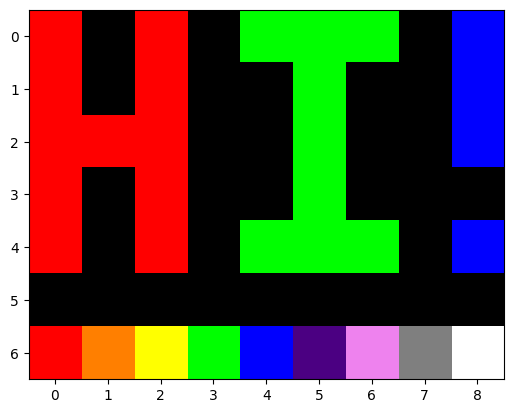

In [ ]:
# load some libraries we'll need
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skimage import io

# define the RGB components of our test image
red = np.array([
    [255,   0, 255,   0,   0,   0,   0,   0,   0],
    [255,   0, 255,   0,   0,   0,   0,   0,   0],
    [255, 255, 255,   0,   0,   0,   0,   0,   0],
    [255,   0, 255,   0,   0,   0,   0,   0,   0],
    [255,   0, 255,   0,   0,   0,   0,   0,   0],
    [  0,   0,   0,   0,   0,   0,   0,   0,   0],
    [255, 255, 255,   0,   0,  75, 238, 127, 255]
],dtype='uint8')

green = np.array([
    [  0,   0,   0,   0, 255, 255, 255,   0,   0],
    [  0,   0,   0,   0,   0, 255,   0,   0,   0],
    [  0,   0,   0,   0,   0, 255,   0,   0,   0],
    [  0,   0,   0,   0,   0, 255,   0,   0,   0],
    [  0,   0,   0,   0, 255, 255, 255,   0,   0],
    [  0,   0,   0,   0,   0,   0,   0,   0,   0],
    [  0, 127, 255, 255,   0,   0, 130, 127, 255]
],dtype='uint8')

blue = np.array([
    [  0,   0,   0,   0,   0,   0,   0,   0, 255],
    [  0,   0,   0,   0,   0,   0,   0,   0, 255],
    [  0,   0,   0,   0,   0,   0,   0,   0, 255],
    [  0,   0,   0,   0,   0,   0,   0,   0,   0],
    [  0,   0,   0,   0,   0,   0,   0,   0, 255],
    [  0,   0,   0,   0,   0,   0,   0,   0,   0],
    [  0,   0,   0,   0, 255, 130, 238, 127, 255]
],dtype='uint8')

# combine to form the image
img = np.dstack((red,green,blue))

# describe the img array
print('the img array has shape ', img.shape)

# draw the image
plt.imshow(img);

This is a $7\times 9$ pixel image.  The following function plots the image along with the magnitudes (shown in grayscale) of the RGB components.

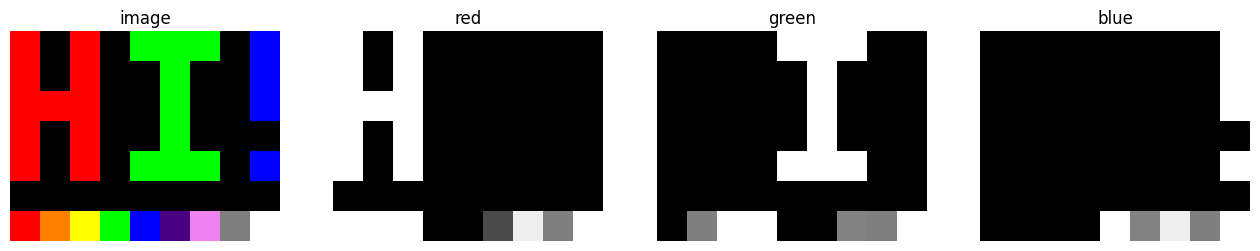

In [ ]:
def show_image_components(img,title='image'):

    import matplotlib.pyplot as plt

    comp_names = ('red','green','blue')

    plt.figure(figsize=(16,4))
    plt.subplot(1,4,1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(title)
    for comp in (0,1,2):
        plt.subplot(1,4,comp+2)
        plt.imshow(img[:,:,comp],cmap="gray")
        plt.axis("off")
        plt.title(comp_names[comp])

show_image_components(img)

## 📝 Trying it out

Here's a more interesting image.  (Make sure you've downloaded the two image files and put them in the same directory as your notebook.)

In [ ]:
img = io.imread("mondrian.png")
show_image_components(img)

Now let's try some compression.  The idea is pretty simple.  Instead of storing each of the three $m\times n$ matrices for the three RGB components, we can instead store the corresponding $X$ and $Y^T$ matrices that come from your low-rank approximation above.  The following function shows how that would work.

**Note:** Our earlier calculation of the 'compression ratio' was a little sloppy due to the fact that the original image data is actually stored as an array of bytes (8 bits per entry) while the $X$ and $Y^T$ arrays are stored as floating point numbers (64 bits per entry).  The function given computes a similar quantity (the percent decrease in storage size) more accurately.  In the real world, we'd want to give more thought to exactly how we should store these numbers.  In practice, though, the SVD is not a particularly strong image compression technique, so there's not a lot of point in working on optimizing storage right now.  Think of this as more a conceptual exercise.

Compressed using 6 singular values, a(n) 76.000 % decrease in size


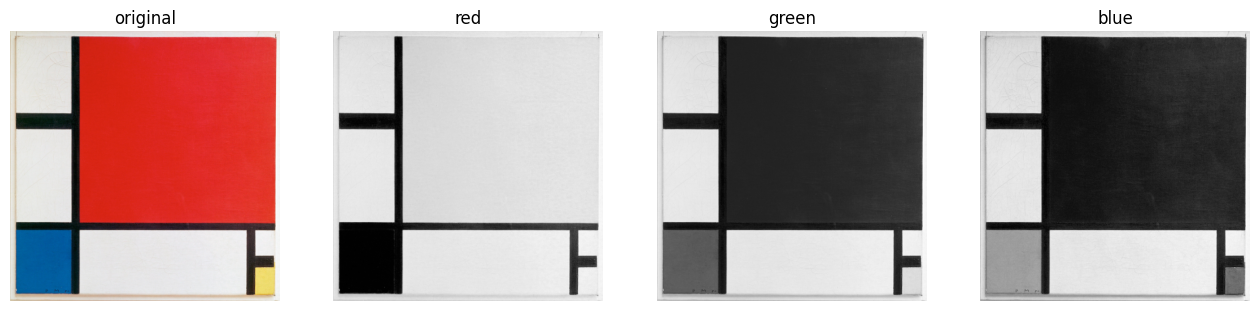

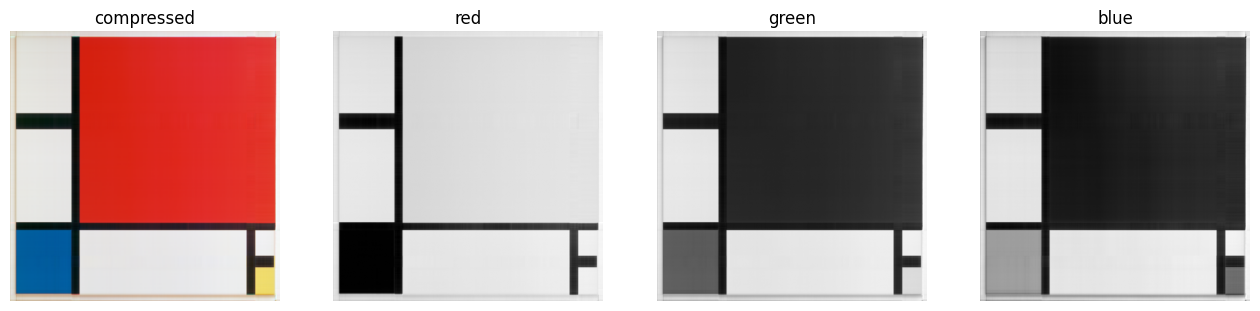

In [ ]:
def compress_image(img,k):
    """
    Performs SVD-based image compression and compares the compressed image
    to the original.

    Args:
        img: an RGB image array (m-by-n-by-3)
        k:   the approximation rank

    Returns:
        Nothing.  This is just a demo function.
    """

    import numpy as np

    # compute the low-rank approximations of the RGB components
    # (These are the 6 arrays we would store to compress the image.)
    Xr,YTr = low_rank_approx(img[:,:,0],k)
    Xg,YTg = low_rank_approx(img[:,:,1],k)
    Xb,YTb = low_rank_approx(img[:,:,2],k)

    # expand the compressed image for comparison with the original
    imgc = np.dstack((Xr.dot(YTr),Xg.dot(YTg),Xb.dot(YTb)))

    # for our image format, we need to represent each pixel as a triple of unsigned bytes
    # so here we take a few steps to conver the floating point array into a byte array
    imgc[imgc<0]   = 0
    imgc[imgc>255] = 255
    imgc = imgc.astype('uint8')

    # show the original and reconstructed image for comparison
    show_image_components(img,'original')
    show_image_components(imgc,'compressed')


    # compare the compressed and original storage sizes
    new_size  = 3*(Xr.size+YTr.size)*8
    orig_size = img.size

    print('Compressed using {} singular values, a(n) {:.3f} % decrease in size'.format( k, 100.*(orig_size-new_size)/orig_size ))

img = io.imread("mondrian.png")
compress_image(img,6)


Experiment with the approximation rank until you find the lowest rank that gives what you think is a reasonable representation of the original image.  What rank looks good to you?

YOUR ANSWER HERE

Compressed using 1 singular values, a(n) 96.000 % decrease in size
Compressed using 4 singular values, a(n) 84.000 % decrease in size
Compressed using 5 singular values, a(n) 80.000 % decrease in size
Compressed using 6 singular values, a(n) 76.000 % decrease in size
Compressed using 10 singular values, a(n) 60.000 % decrease in size


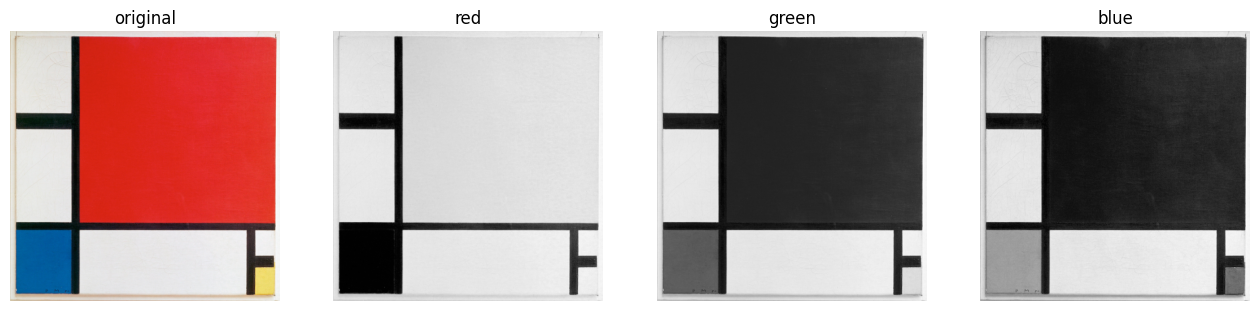

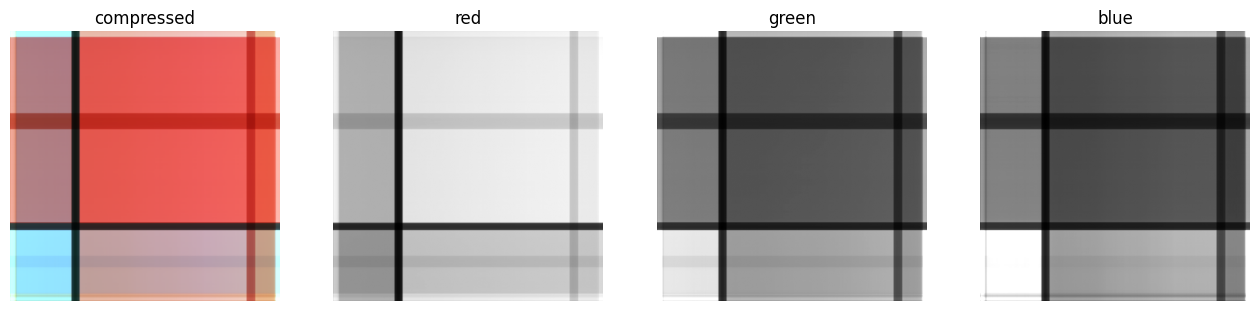

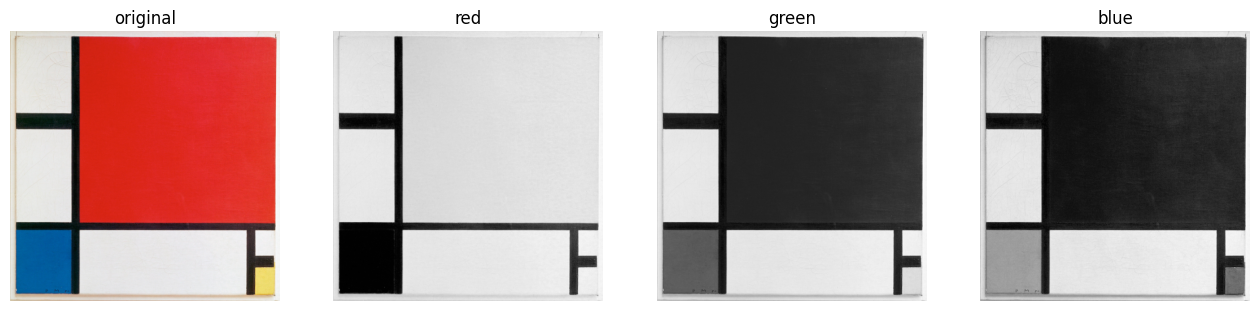

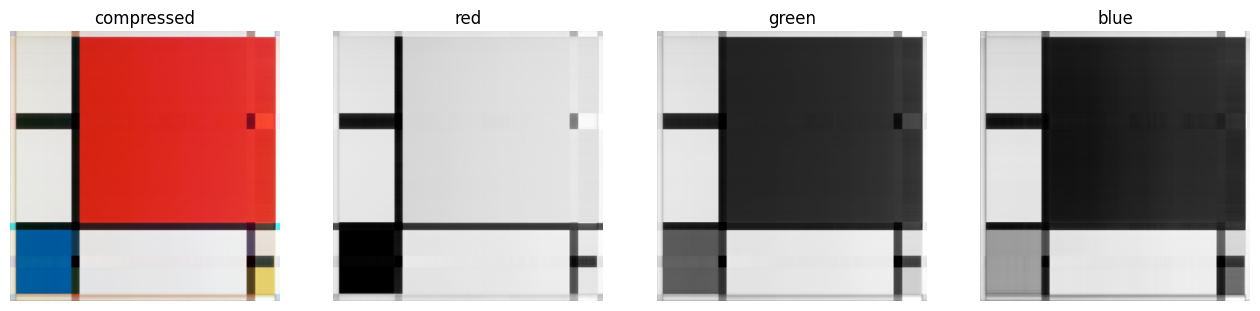

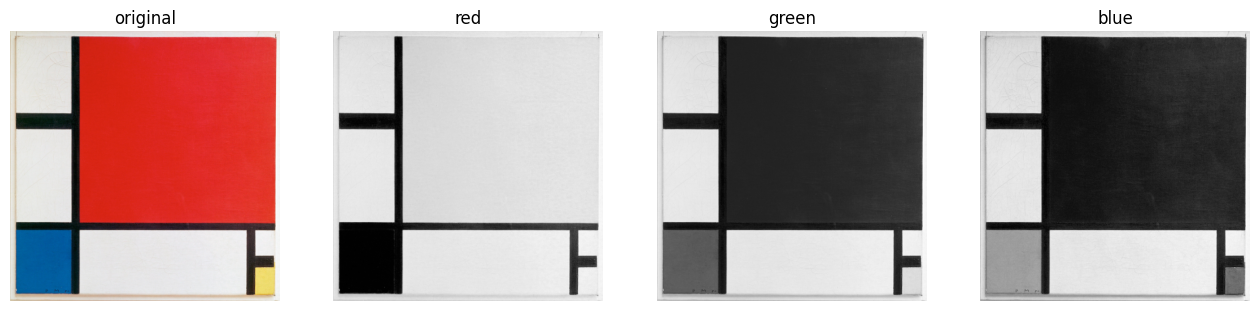

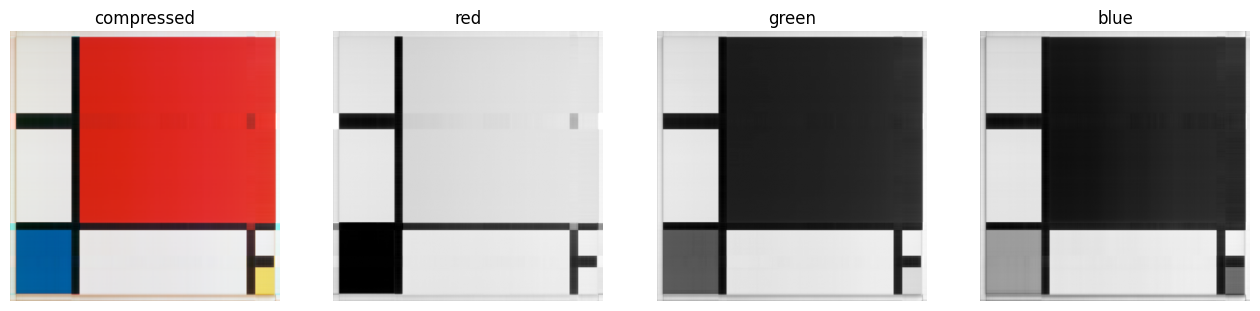

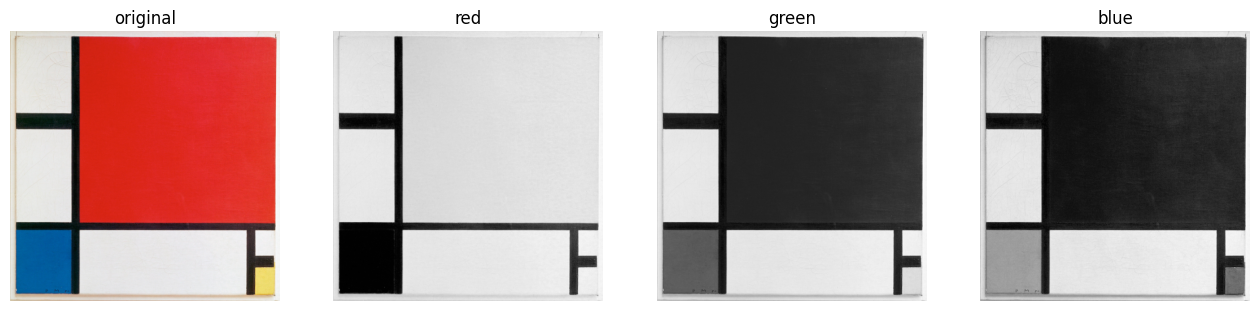

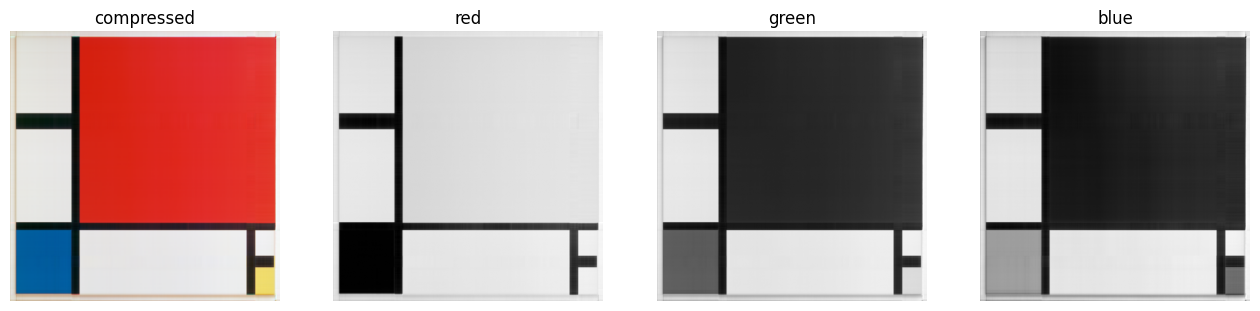

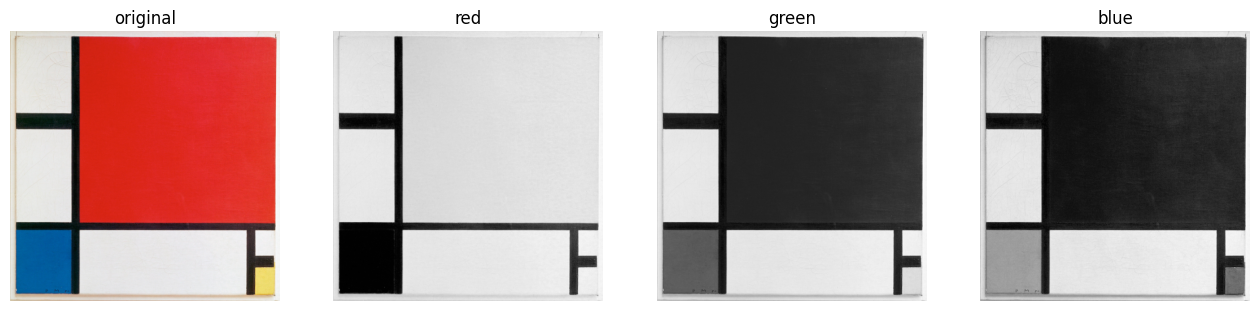

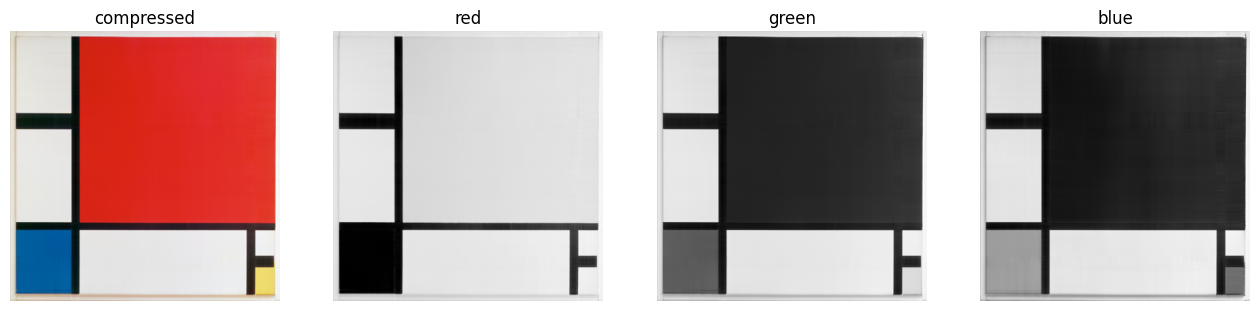

In [ ]:
img = io.imread("mondrian.png")
for rank in [1, 4, 5, 6, 10]:
  compress_image(img, rank)

I ran a few experiments with ranks of 1, 4, 5, 6, and 10. What you will see is that the first rank had a very blurry image. This continued until about rank 6 where there were no visible imperfections and there was no change compared to a rank of 10, even though the file sized decreased by 76% for a rank of 6 while only 60% for a rank of 10.

## 📝 Something to think about

The following shows the same process for a rotate version of the original image.

Compressed using 10 singular values, a(n) 60.000 % decrease in size
Compressed using 20 singular values, a(n) 20.000 % decrease in size
Compressed using 30 singular values, a(n) -20.000 % decrease in size
Compressed using 40 singular values, a(n) -60.000 % decrease in size
Compressed using 50 singular values, a(n) -100.000 % decrease in size


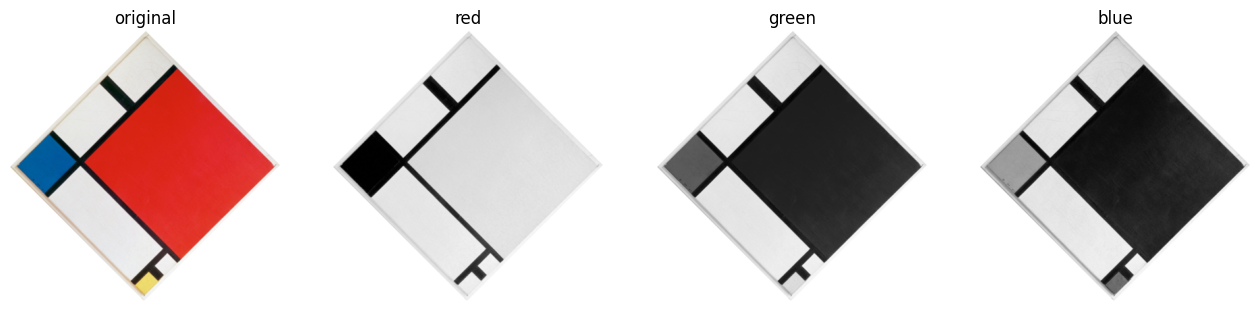

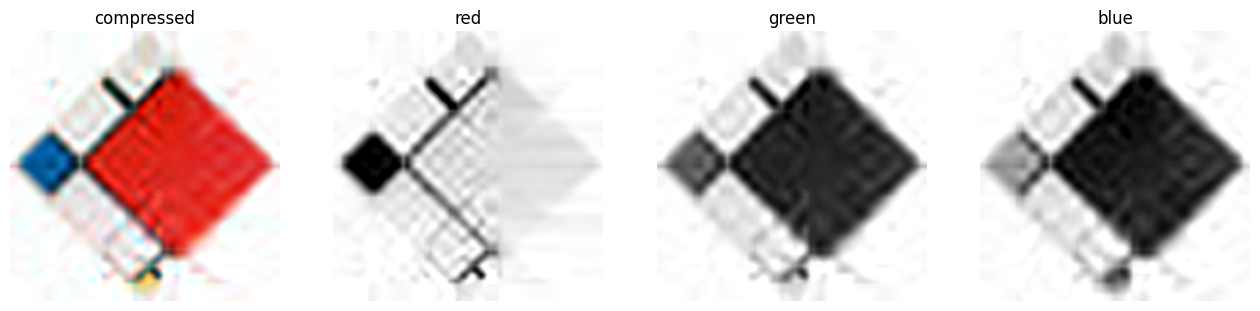

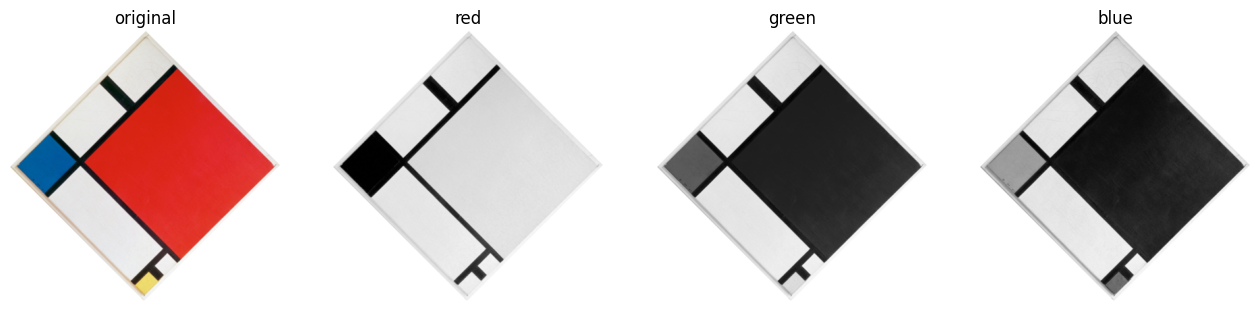

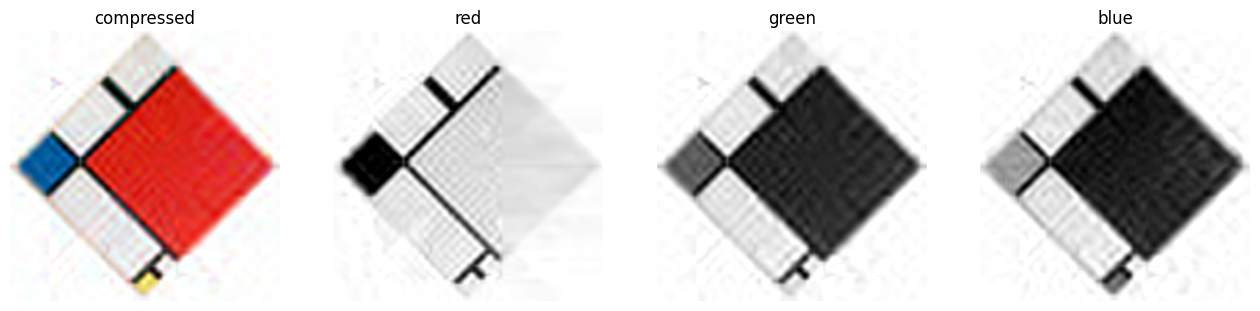

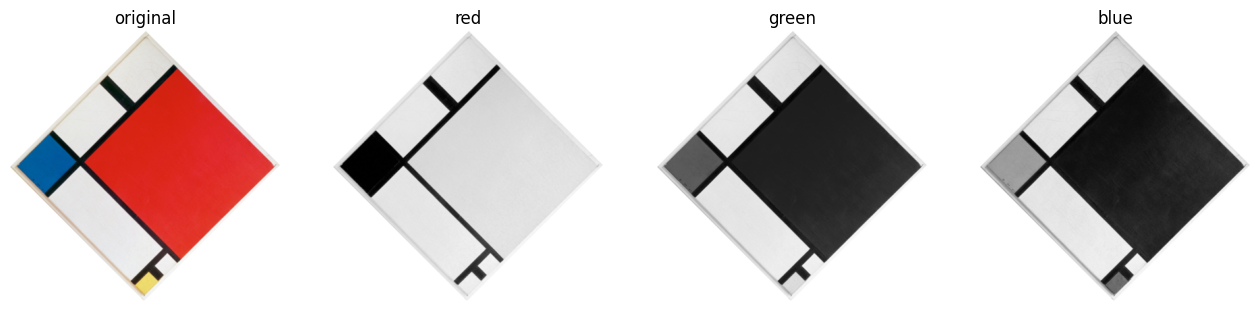

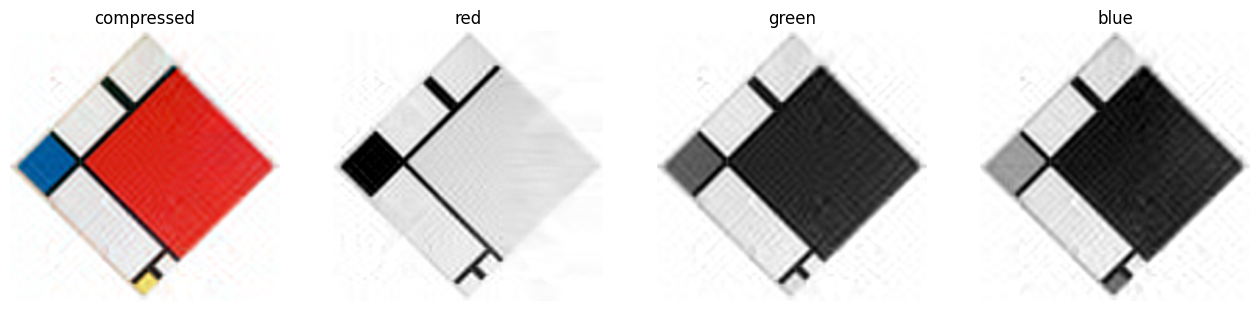

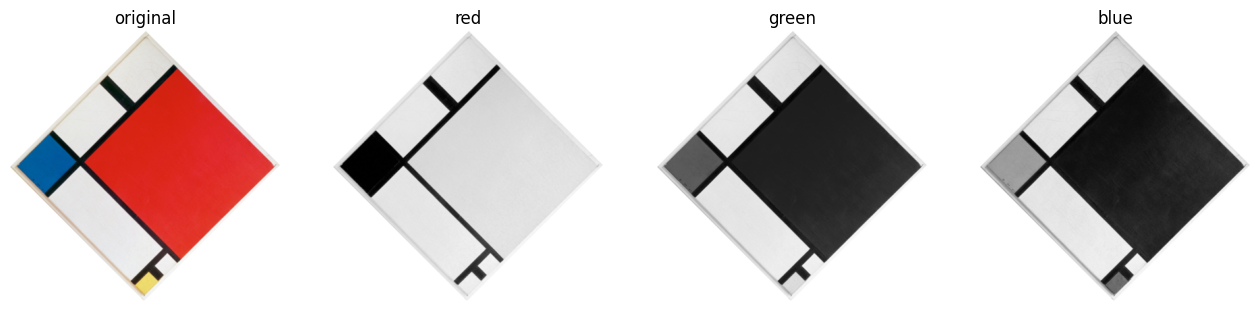

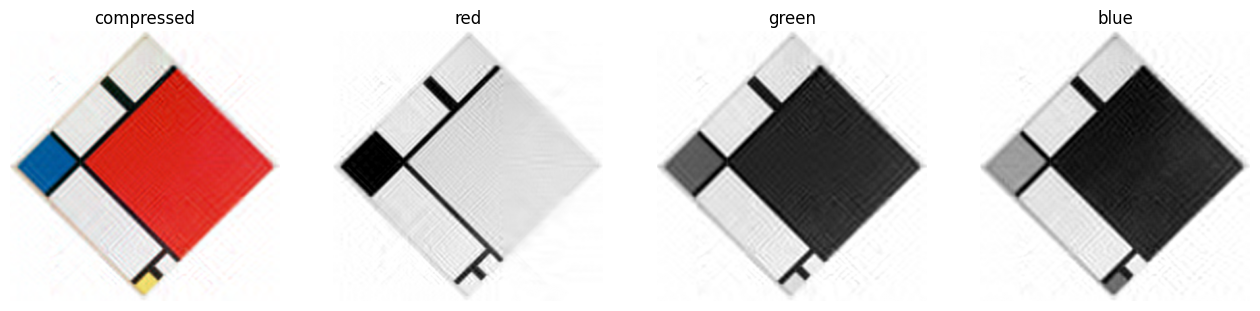

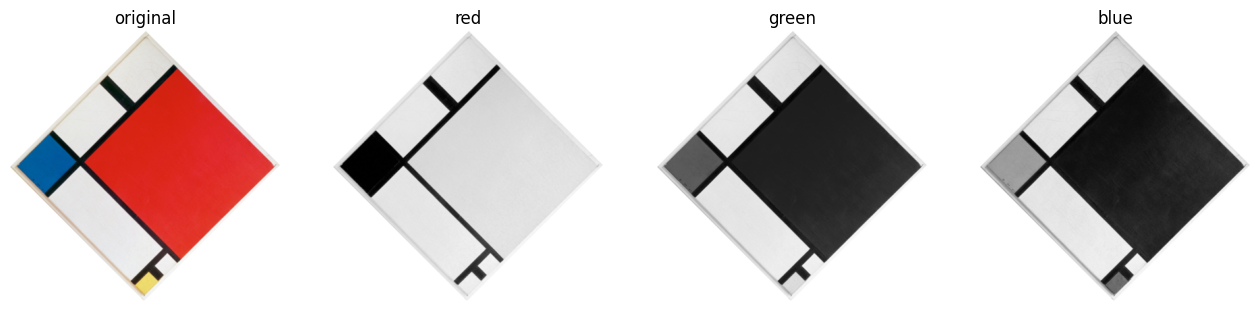

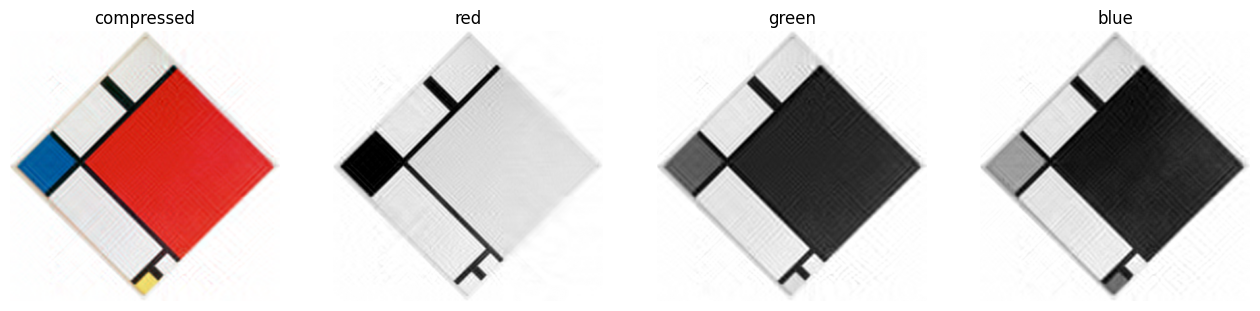

In [27]:
img = io.imread("mondrian_r.png")
for rank in [10, 20, 30, 40, 50]:
  compress_image(img,rank)

Experiment with the parameter $k$ in the code above.  How does it compare to the unrotated example?  Why do you think the two examples behave differently?  What types of images will SVD-based compression work best for?

With this, by using ranks of 10, 20, 30, 40, and 50, we were able to get more granually, but after the 20 it then increases in storage size while decreasing in quality. This is not ideal and very different than the example prior. The likely reason for this is that the rotation is another linear transformation that the decomposition matrix is not taking into consideration and the inherent structure with squares, and vertical lines works well for a matrix, but not when at an arbitrary angle. So, images wiht straight up and down lines would likely work better.